In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'C:\\Users\\User\\Documents\\GitHub\\quick_training\\Part 2'

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'available_facies.txt',
 'csv_files',
 'data_exploration.ipynb',
 'data_preparation.ipynb',
 'facies_classification.ipynb',
 'las_files',
 'litho_nomenclatures.txt',
 'README.md']

In [4]:
os.chdir('./csv_files')

In [5]:
os.listdir()

['15_9-13.csv',
 '16_10-1.csv',
 '25_2-14.csv',
 '29_6-1.csv',
 '30_6-5.csv',
 '31_2-8.csv',
 '34_10-35.csv',
 '34_11-1.csv',
 'final_log.csv',
 'testing.csv',
 'training_and_validation.csv']

In [6]:
filename = 'training_and_validation.csv'
train_and_validate = pd.read_csv(filename)
train_and_validate

,Unnamed: 0,well_names,depth,facies_ID,NPHI,RHOB,GR,DTC,RDEP,SP
0,0,15_9-13,2195.023682,5,0.522770,2.201400,44.347900,116.847565,0.607,68.425003
1,1,15_9-13,2195.176025,5,0.510540,2.263696,46.780998,103.989662,0.623,68.800003
2,2,15_9-13,2195.328369,5,0.567540,2.261032,50.405998,104.479271,0.635,68.425003
3,3,15_9-13,2195.480957,5,0.615493,2.218486,50.779697,112.816071,0.630,69.050003
4,4,15_9-13,2195.633301,5,0.654678,2.214220,49.958050,113.581688,0.625,69.175003
...,...,...,...,...,...,...,...,...,...,...
45424,45424,31_2-8,3364.632324,5,0.208680,2.540000,72.981003,77.158836,3.337,93.647003
45425,45425,31_2-8,3364.784668,5,0.212740,2.551000,82.141998,77.733780,3.339,93.625999
45426,45426,31_2-8,3364.937012,6,0.209460,2.527000,85.860001,77.804298,3.324,93.498001
45427,45427,31_2-8,3365.089600,6,0.197980,2.497000,76.985001,78.220123,3.222,93.550003


In [7]:
train_and_validate.describe()

,Unnamed: 0,depth,facies_ID,NPHI,RHOB,GR,DTC,RDEP,SP
count,45429.000000,45429.000000,45429.000000,45429.000000,45429.000000,45429.000000,45429.000000,45429.000000,45429.000000
mean,22714.000000,2835.397937,6.428691,0.265600,2.435410,67.651424,86.465355,3.763126,79.084008
std,13114.367026,727.083375,3.553737,0.137731,0.159950,33.737266,26.360510,26.731777,25.670321
min,0.000000,1402.177612,1.000000,-0.000000,1.389000,0.000000,17.029234,0.126700,5.119547
25%,11357.000000,2339.894775,5.000000,0.175890,2.342900,44.157650,75.006149,1.481100,58.875813
50%,22714.000000,2773.119385,6.000000,0.281760,2.454000,66.313637,86.130173,2.508000,71.925003
75%,34071.000000,3180.228272,6.000000,0.365720,2.549000,86.933525,99.238441,4.418310,100.752693
max,45428.000000,4819.430664,26.000000,0.877123,3.279993,519.500000,166.718750,2000.000000,176.357437


In [8]:
os.getcwd()

'C:\\Users\\User\\Documents\\GitHub\\quick_training\\Part 2\\csv_files'

In [9]:
drop_col = ['Unnamed: 0']
train_and_validate = train_and_validate.drop(columns = drop_col)
train_and_validate = train_and_validate.dropna()
train_and_validate.describe()

,depth,facies_ID,NPHI,RHOB,GR,DTC,RDEP,SP
count,45429.000000,45429.000000,45429.000000,45429.000000,45429.000000,45429.000000,45429.000000,45429.000000
mean,2835.397937,6.428691,0.265600,2.435410,67.651424,86.465355,3.763126,79.084008
std,727.083375,3.553737,0.137731,0.159950,33.737266,26.360510,26.731777,25.670321
min,1402.177612,1.000000,-0.000000,1.389000,0.000000,17.029234,0.126700,5.119547
25%,2339.894775,5.000000,0.175890,2.342900,44.157650,75.006149,1.481100,58.875813
50%,2773.119385,6.000000,0.281760,2.454000,66.313637,86.130173,2.508000,71.925003
75%,3180.228272,6.000000,0.365720,2.549000,86.933525,99.238441,4.418310,100.752693
max,4819.430664,26.000000,0.877123,3.279993,519.500000,166.718750,2000.000000,176.357437


In [10]:
train_and_validate = train_and_validate[(train_and_validate.NPHI >0) & (train_and_validate.RHOB >=2) 
                                & (train_and_validate.RHOB <=3) & (train_and_validate.GR <= 200)]
train_and_validate

,well_names,depth,facies_ID,NPHI,RHOB,GR,DTC,RDEP,SP
0,15_9-13,2195.023682,5,0.522770,2.201400,44.347900,116.847565,0.607,68.425003
1,15_9-13,2195.176025,5,0.510540,2.263696,46.780998,103.989662,0.623,68.800003
2,15_9-13,2195.328369,5,0.567540,2.261032,50.405998,104.479271,0.635,68.425003
3,15_9-13,2195.480957,5,0.615493,2.218486,50.779697,112.816071,0.630,69.050003
4,15_9-13,2195.633301,5,0.654678,2.214220,49.958050,113.581688,0.625,69.175003
...,...,...,...,...,...,...,...,...,...
45424,31_2-8,3364.632324,5,0.208680,2.540000,72.981003,77.158836,3.337,93.647003
45425,31_2-8,3364.784668,5,0.212740,2.551000,82.141998,77.733780,3.339,93.625999
45426,31_2-8,3364.937012,6,0.209460,2.527000,85.860001,77.804298,3.324,93.498001
45427,31_2-8,3365.089600,6,0.197980,2.497000,76.985001,78.220123,3.222,93.550003


In [32]:
lithofacies = open('../available_facies.txt').readlines()
lithofacies

['1\tSS\tSand\n',
 '2\tSiS\tSand\n',
 '3\tCBS\tCrossBedded Sand\n',
 '4\tShSS\tShaly Sandstone\n',
 '5\tSi\tSilt\n',
 '6\tShSi\tSilt\n',
 '7\tSiSh\tShale\n',
 '9\tCh\tChalk\n',
 '10\tCaSS\tCalcareous Sandstone\n',
 '11\tLi\tLimestone\n',
 '12\tArLi\tChalk\n',
 '13\tMS\tChalk\n',
 '16\tSSLi\tSandy Limestone\n',
 '18\tCoal\tCoal\n',
 '19\tCin\tExtrusive\n',
 '21\tHal\tHalite\n',
 '22\tAnh\tAnhydrite\n',
 '26\tGyp\tGypsum']

In [33]:
lithofacies = [line.strip().replace('\n', '').split("\t")[1] for line in lithofacies]
lithofacies

['SS',
 'SiS',
 'CBS',
 'ShSS',
 'Si',
 'ShSi',
 'SiSh',
 'Ch',
 'CaSS',
 'Li',
 'ArLi',
 'MS',
 'SSLi',
 'Coal',
 'Cin',
 'Hal',
 'Anh',
 'Gyp']

In [34]:
colours = ['#76eec6','#ffebcd','#0000ff','#a52a2a','#ff4040','#deb887','#98f5ff','#7fff00','#458b00','#ff7f24',
           '#eee8cd','#00ffff','#ffb90f','#006400','#caff70','#9932cc','#1e90ff','#b22222']

facies_by_color = dict(zip(lithofacies, colours))
facies_colors = facies_by_color.values()

In [44]:
def log_plotter(well_name, facies_colors):
    #make sure logs are sorted by depth
    logs = train_and_validate[train_and_validate['well_names'] == well_name].sort_values(by='depth')
    cmap_facies = mcolors.ListedColormap(facies_colors, 'indexed')
    
    max_depth=logs.depth.min(); min_depth=logs.depth.max()
    
    #cluster=np.repeat(np.expand_dims(logs['facies_ID'].values, 1), 100, 0)
    cluster=np.repeat(np.expand_dims(logs['facies_ID'].values,1), 100, 1)
   
    fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(8, 14))
    
    ax[0].plot(logs.GR, logs.depth, '-g')
    ax[1].plot(logs.RHOB, logs.depth, '-')
    ax[2].plot(logs.NPHI, logs.depth, '-', color='0.5')
    ax[3].plot(logs.DTC, logs.depth, '-', color='r')
    ax[4].plot(logs.RDEP, logs.depth, '-', color='blue')
    ax[5].plot(logs.SP, logs.depth, '-', color='black')
    
    im=ax[6].imshow(cluster, interpolation='none', aspect='auto', cmap=cmap_facies,vmin=1,vmax=len(facies_colors))
    #im = sns.heatmap(cluster, cmap=cmap_facies, annot = False)
    divider = make_axes_locatable(ax[6])
    cax = divider.append_axes("right", size="10%", pad=0.05)
    cbar=plt.colorbar(im, cax=cax)
    cbar.set_label((8*' ').join(lithofacies))
    #cbar.set_label(facies_symbol)
    cbar.set_ticks(range(0,1)); cbar.set_ticklabels('')
 
    for i in range(len(ax)):
        ax[i].set_ylim(max_depth,min_depth)
        ax[i].invert_yaxis()
        ax[i].grid()
        ax[i].locator_params(axis='x', nbins=3)
    
    ax[0].set_xlabel("GR")
    ax[0].set_xlim(logs.GR.min(),logs.GR.max())
    ax[1].set_xlabel("RHOB")
    ax[1].set_xlim(logs.RHOB.min(),logs.RHOB.max())
    ax[2].set_xlabel("NPHI")
    ax[2].set_xlim(logs.NPHI.min(),logs.NPHI.max())
    ax[3].set_xlabel("DTC")
    ax[3].set_xlim(logs.DTC.min(),logs.DTC.max())
    ax[4].set_xlabel("RDEP")
    ax[4].set_xlim(logs.RDEP.min(),logs.RDEP.max())  
    ax[5].set_xlabel("SP")
    ax[5].set_xlim(logs.SP.min(),logs.SP.max())   
    ax[6].set_xlabel('lithofacies')
    
    ax[1].set_yticklabels([]); ax[2].set_yticklabels([]); ax[3].set_yticklabels([])
    ax[4].set_yticklabels([]); ax[5].set_yticklabels([]); ax[6].set_yticklabels([])
    ax[6].set_xticklabels([])
    
    fig.suptitle('Well: %s'%logs.iloc[0]['well_names'], fontsize=14, y=0.94)

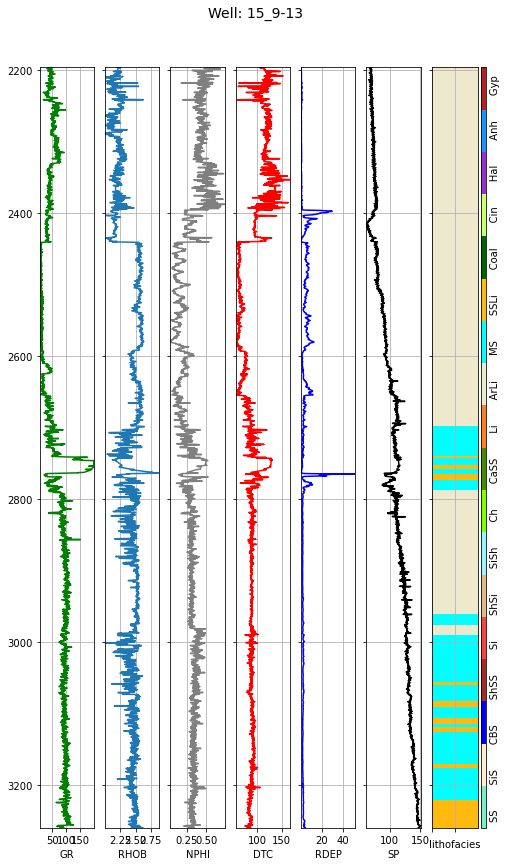

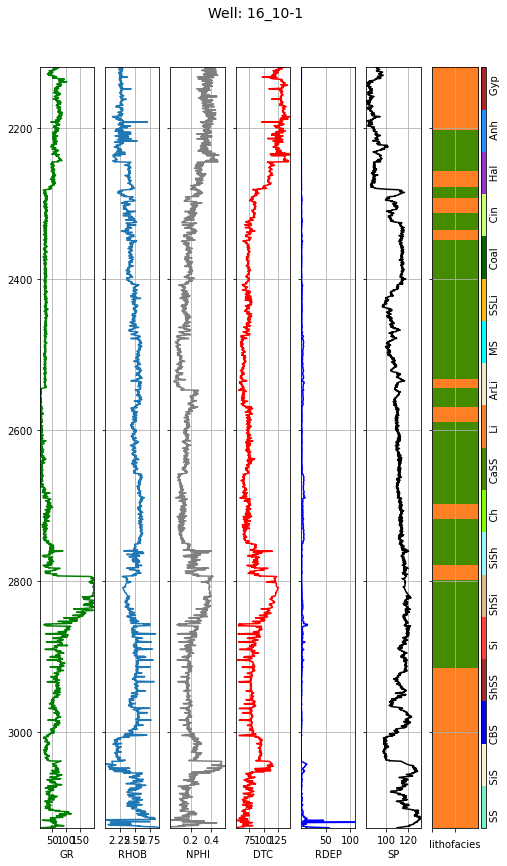

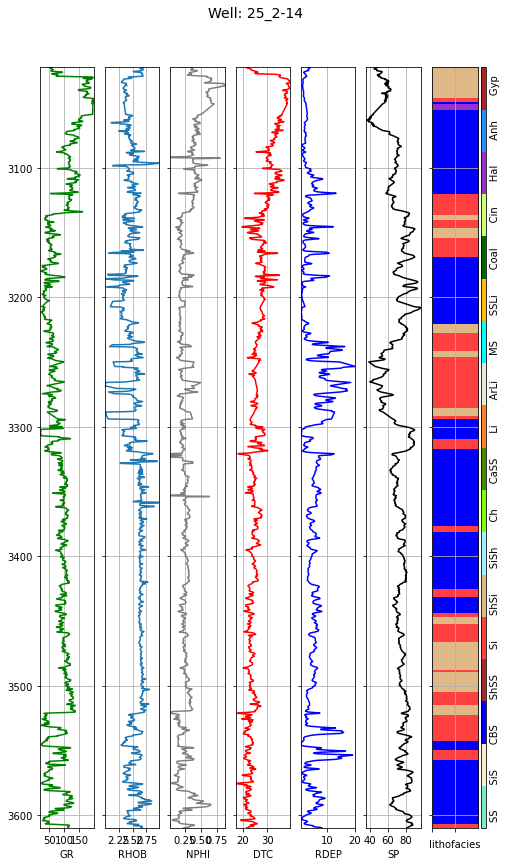

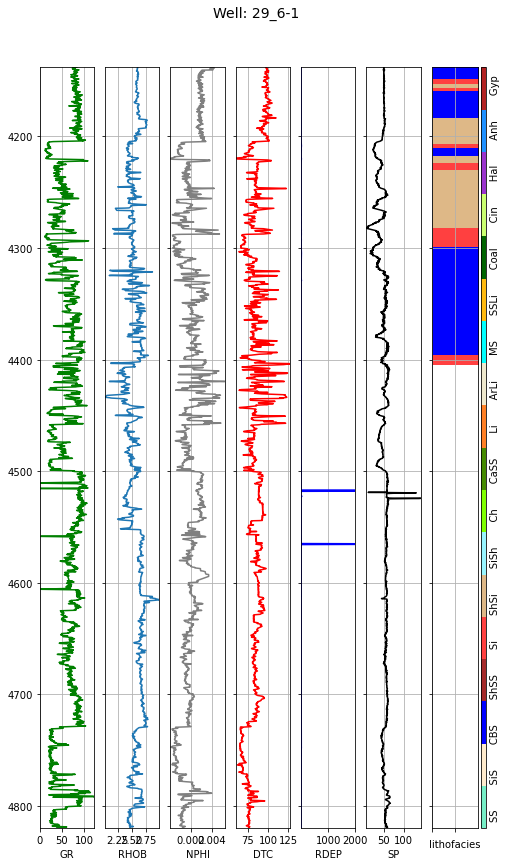

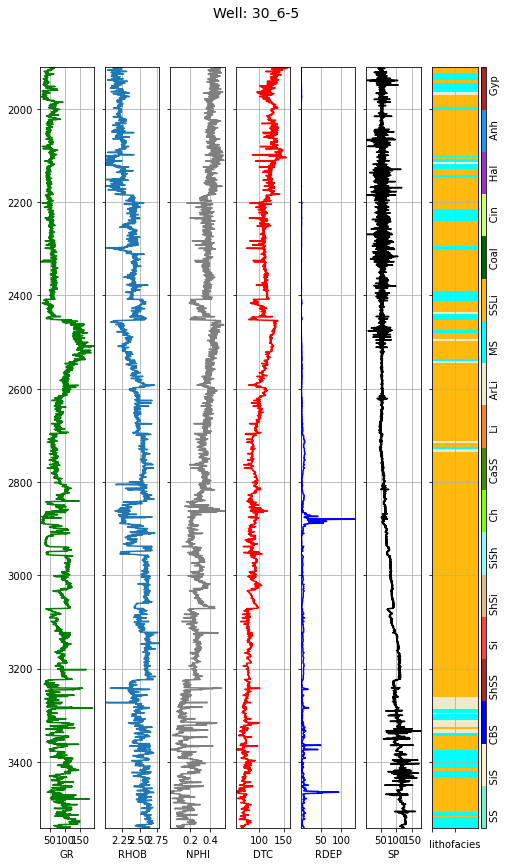

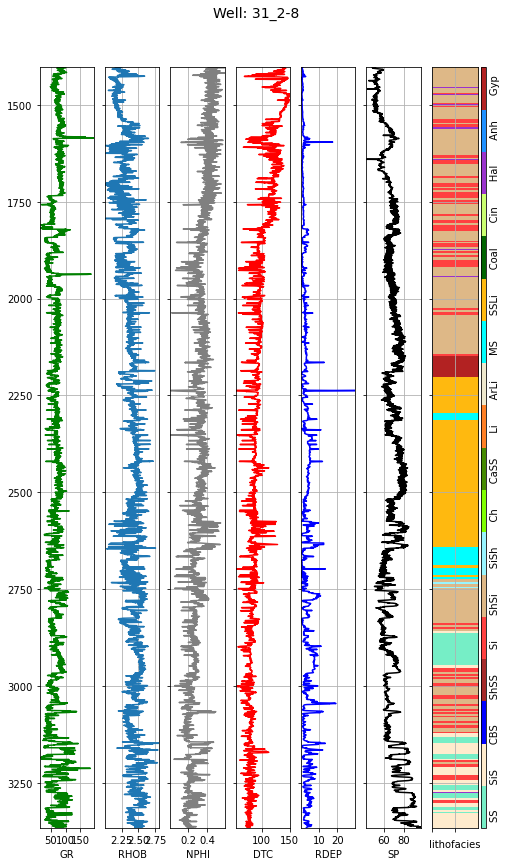

In [45]:
for name in list(train_and_validate['well_names'].unique()):
    log_plotter(name, facies_colors)

In [ ]:
lithofacies_counts = train_and_validate['facies_ID'].value_counts().sort_index()
new_index = list(range(1, len(lithofacies)+1))

available_facies = [facie for i, facie in zip(new_index, lithofacies) if i in lithofacies_counts.index]

lithofacies_counts.index = available_facies

lithofacies_counts.plot(kind='bar', color = facies_colors, title='Available Facies Distribution')

In [ ]:
lithofacies_counts

In [ ]:
available_facies

In [ ]:
train_and_validate.columns

In [52]:
correct_facies_labels = train_and_validate['facies_ID'].values

feature_vectors = train_and_validate.drop(['depth','facies_ID'], axis=1)
feature_vectors = feature_vectors.drop(['well_names'], axis=1)
feature_vectors

,NPHI,RHOB,GR,DTC,RDEP,SP
0,0.522770,2.201400,44.347900,116.847565,0.607,68.425003
1,0.510540,2.263696,46.780998,103.989662,0.623,68.800003
2,0.567540,2.261032,50.405998,104.479271,0.635,68.425003
3,0.615493,2.218486,50.779697,112.816071,0.630,69.050003
4,0.654678,2.214220,49.958050,113.581688,0.625,69.175003
...,...,...,...,...,...,...
45424,0.208680,2.540000,72.981003,77.158836,3.337,93.647003
45425,0.212740,2.551000,82.141998,77.733780,3.339,93.625999
45426,0.209460,2.527000,85.860001,77.804298,3.324,93.498001
45427,0.197980,2.497000,76.985001,78.220123,3.222,93.550003


In [54]:
correct_facies_labels

array([5, 5, 5, ..., 6, 6, 6], dtype=int64)

In [48]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [49]:
# initialize our model
model = svm.SVC()

In [53]:
scaler = preprocessing.StandardScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)

In [55]:
X_train, X_val, y_train, y_val = train_test_split(scaled_features, correct_facies_labels, 
                                                    test_size=0.2, random_state=42)

In [56]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [57]:
predicted_labels = model.predict(X_val)

In [58]:
conf = confusion_matrix(y_val, predicted_labels)
#display_cm(conf, facies_labels, hide_zeros=True)
conf

array([[ 132,   44,   11,    2,    0,    0,    0,    1,    7,    1,    2,
           0,    1,    0,    0,    0,    0],
       [  20,  287,   54,   12,   74,    0,    0,    1,    1,    3,   12,
           1,    0,    0,    1,    0,    0],
       [   8,   27,  642,    0,   60,   19,    2,    0,    0,    0,    2,
           2,    0,    1,    0,    0,    0],
       [   0,    7,    1,  174,   50,    0,    0,    0,    0,    0,    1,
           5,    0,    0,    7,    0,    0],
       [   1,   59,   57,   38, 1971,  529,    1,    0,    0,    0,    0,
          18,    0,    0,    7,    0,    0],
       [   0,    2,   11,    0,  597, 1824,   26,    0,    0,    0,    0,
           4,    0,    1,    0,    0,    0],
       [   0,    0,    0,    0,    1,  104,  257,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,  142,   94,    4,    0,
           0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0

In [60]:
#from sklearn.metrics import plot_confusion_matrix

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import itertools

    np.set_printoptions(precision=2)
    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(12, 12))
    plt.title("Confusion Matrix")
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


disp = plot_confusion_matrix(conf, target_names=correct_facies_labels, cmap=plt.cm.Blues, normalize=False)


KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000021B7A897318> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000021B7A982D38> (for post_execute):


KeyboardInterrupt: 

In [65]:
y_train

array([5, 5, 6, ..., 5, 5, 5], dtype=int64)

In [68]:
X_train.shape

(35784, 6)

In [69]:
result_train = model.score(X_train, y_train)
result_train

0.7289570757880617

In [70]:
result_val = model.score(X_val, y_val)
result_val

0.7223340040241448

In [72]:
print("Accuracy: %.3f%%" % (result_val*100.0))
print("F1 Score: ", f1_score(y_val, predicted_labels, average="macro"))
print("Precision Score: ", precision_score(y_val, predicted_labels, average="macro"))
print("Recall Score: ", recall_score(y_val, predicted_labels, average="macro"))

Accuracy: 72.233%
F1 Score:  0.6082340454343746
Precision Score:  0.679347281093964
Recall Score:  0.5911218311268388


In [ ]:
# explain what each metric means 

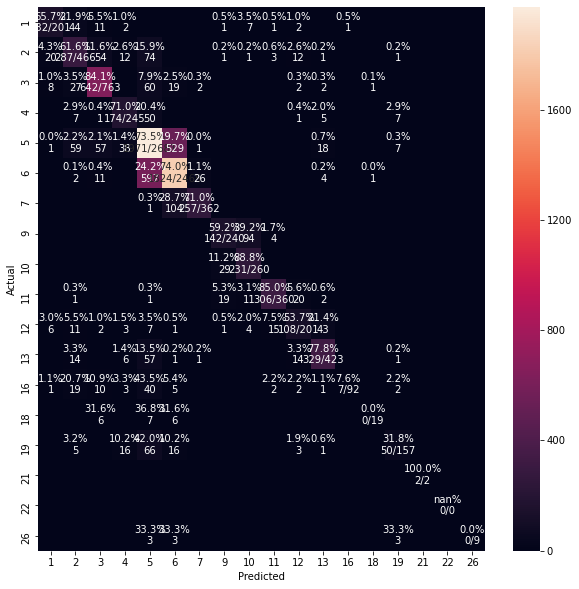

In [76]:
import seaborn as sns
def cm_analysis(y_val, y_pred, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_val:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_val, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_val = [ymap[yi] for yi in y_val]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_val, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.show()

cm_analysis(y_val, predicted_labels, model.classes_, ymap=None, figsize=(10,10))

In [ ]:
# make a similar plot as above but including the predicted facies
# include validation with 1 well containing the same set of logs and facies